<a href="https://colab.research.google.com/github/Jcnok/Bootcamps_XPe/blob/main/desafio_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando o dataset na pasta tmp.

In [1]:
# Baixando o arquivo.zip do site na pasta tmp
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-02-02 03:16:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.8MB/s    in 3.8s    

2023-02-02 03:16:05 (17.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# importação da lib para extrair o arquivo zipado.
import zipfile
# importação da lib para iterar com o Sistema
import os

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip' # path do arquivo zipado
zip_ref = zipfile.ZipFile(local_zip, 'r') # leitura do arquivo zipado
zip_ref.extractall('/tmp') # extrair todos os arquivos e subdiretórios na pasta /tmp
zip_ref.close() #encerra a leitura

In [4]:
# conferindo os diretórios e arquivos extraídos.
!ls /tmp/cats_and_dogs_filtered/

train  validation  vectorize.py


### Setando as pastas de treino, validação, treino de gatos, treino de cães, validação de gatos, validação de cães.

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered' # path da raiz
train_dir = os.path.join(base_dir,'train') # path da pasta de treinamento
validation_dir = os.path.join(base_dir,'validation') # path da pasta de validação
train_cats_dir = os.path.join(train_dir,'cats') # path da pasta train de gatos
train_dogs_dir = os.path.join(train_dir,'dogs') # path da pasta train de cães
validation_cats_dir = os.path.join(validation_dir,'cats') #path da pasta validação de gatos
validation_dogs_dir = os.path.join(validation_dir,'dogs') # path da pasta validação de cães

* **Conferindo o diretório das pastas**.

In [6]:
print(f"caminho da pasta treino:{train_dir}\
\ncaminho da pasta validação:{validation_dir}\
\ncaminho da pasta treino de gatos:{train_cats_dir}\
\ncaminho da pastas treino cães:{train_dogs_dir}\
\ncaminho da pasta validação de gatos:{validation_cats_dir}\
\ncaminho da pastas validação cães:{validation_dogs_dir}")

caminho da pasta treino:/tmp/cats_and_dogs_filtered/train
caminho da pasta validação:/tmp/cats_and_dogs_filtered/validation
caminho da pasta treino de gatos:/tmp/cats_and_dogs_filtered/train/cats
caminho da pastas treino cães:/tmp/cats_and_dogs_filtered/train/dogs
caminho da pasta validação de gatos:/tmp/cats_and_dogs_filtered/validation/cats
caminho da pastas validação cães:/tmp/cats_and_dogs_filtered/validation/dogs


* **Conferindo o quantidade de imagens de treino e validação para ambos os animais.**

In [7]:
!find /tmp/cats_and_dogs_filtered/train/ -type f | wc -l
!find /tmp/cats_and_dogs_filtered/validation/ -type f | wc -l

2000
1000


* **Como podemos verificar, temos 3mil imagens ao todo.**


In [8]:
# lib para carregar imagens.
from tensorflow.keras.preprocessing.image import load_img

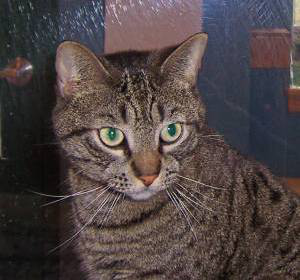

In [9]:
#Visualizando um imagem da pasta de treinamento cat.
load_img(train_cats_dir+'/cat.1.jpg')

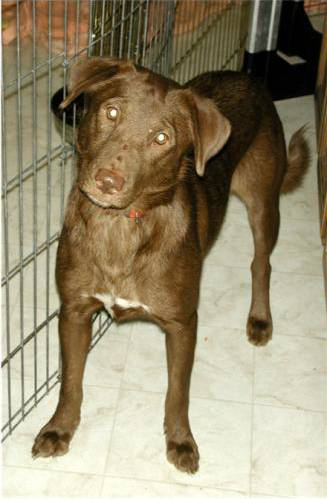

In [10]:
# visualizando uma imagem da pasta de treinamento dog.
load_img(train_dogs_dir+'/dog.1.jpg')

* **Conforme o enunciado:**
  * *juntar treinamento e validação em um único array*.
  * *redimensionar as imagens para (128,200)*.
  * *gerar imagens data agumentation, variando largura e altura em 20% e rotacionando em 45%.*.
  * *criar 1000 imagens data agumentation e adicioná-las ao conjunto.*
  * *utilizar o método train_test_split 70% treino e 30% teste*.
  * *instânciar as 3 redes (VGG16,VGG19 e ResNet152)*.

In [11]:
from keras.preprocessing.image import ImageDataGenerator # lib para realizar os ajuste nas imgagens.
from matplotlib import pyplot as plt #lib para visualização
import numpy as np # lib para conversão em array.

* **Vamos realizar um exemplo para entendermos como as imagens serão alteradas com o ImageDataGenerator.**


Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


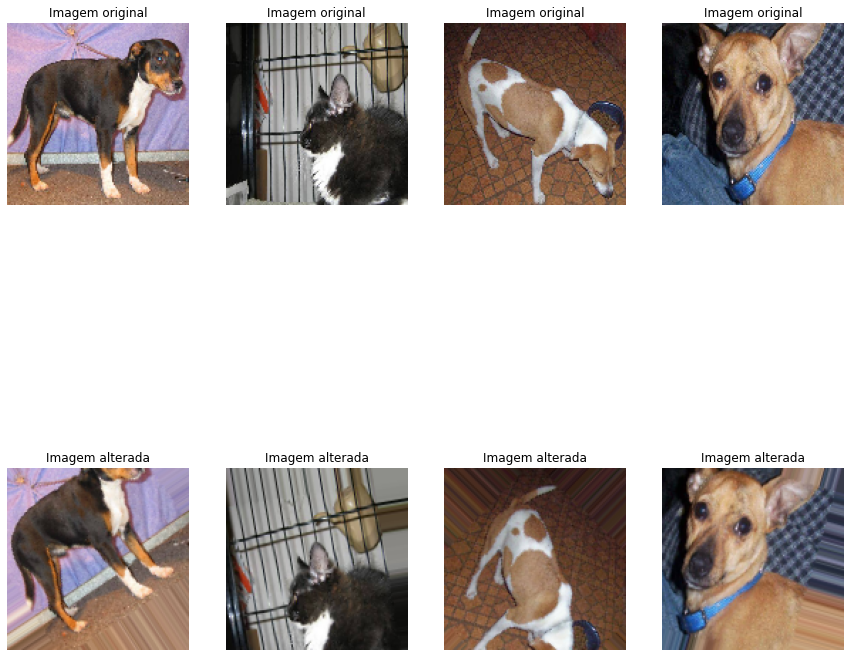

In [12]:
# Alterando as imagens.
datagen = ImageDataGenerator(
                  height_shift_range=0.2, # altura 20%
                  width_shift_range=0.2, # largura 20%
                  rotation_range=45 # Rotação 45 graus 
                  )      

# Imagem sem alteração.
datanorm = ImageDataGenerator()

# Conjunto com alterações
treino_alterado = datagen.flow_from_directory(base_dir,
                  target_size=(128, 128), # padronizando todas as imagens
                  color_mode="rgb", # imagem colorida
                  batch_size=1, # numero de imagens extraída por batch
                  class_mode="binary", # classes
                  seed=2020 # para que os resultados sejam reproduzidos
                  )

# Conjunto sem sofrer alterações 
treino_normal = datanorm.flow_from_directory(base_dir,
                  target_size=(128, 128), # altera a imagen para 200 x 200
                  color_mode="rgb", # imagem colorida
                  batch_size=1, # uma imagem por batch
                  class_mode="binary", # como são 2 classes vamos utilizar o binário
                  seed=2020 # semente para conseguirmos replicar o código
                  )

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,15))

# Plotando imagens 4 x 4
for i in range(4):

  # convertendo a imagem para inteiro
  image = next(treino_alterado)[0].astype('uint8')
  image2 = next(treino_normal)[0].astype('uint8')

  # alterando o formato (1, 200, 200, 3) para (200, 200, 3) para plotar a imagem
  image = np.squeeze(image)
  image2 = np.squeeze(image2)


  # plotando as imagens
  ax[0,i].imshow(image2)
  ax[0,i].set_title('Imagem original')
  ax[0,i].axis('off')
  ax[1,i].imshow(image)
  ax[1,i].set_title('Imagem alterada')
  ax[1,i].axis('off')

* As imagens foram criadas conforme o enunciado: 
   * redimensionar as imagens para (128,200).
   * gerar imagens data agumentation, variando largura e altura em 20% e rotacionando em 45%.

* Como se trata de um experimento irei manter as formatações, porém acredito que não seja as mais adequadas.

Criando o data set

In [13]:
# realizando o redimensionamento das 3 mil imagens.
#dataset de treinamento
gera_dataset = ImageDataGenerator()
treino = gera_dataset.flow_from_directory(
                                            train_dir, # diretório treino
                                            target_size = (128, 128), #redimensiona a imagem
                                            batch_size = 1, # altera 1/1
                                            class_mode = 'categorical', #tipo 0 ou 1
                                            #save_to_dir= '/tmp/treino', # pasta para armazenamento das imagens
                                            #save_prefix='gatos_e_cães', # prefixo das imagens
                                            #save_format='png', # tipo da imgagen gerada.
                                            shuffle = False # realiza em ordem
                                          )
# dataset de validação
valid = gera_dataset.flow_from_directory(
                                            validation_dir, # diretório validação
                                            target_size = (128, 128), #redimensiona a imagem
                                            batch_size = 1, # altera 1/1
                                            class_mode = 'categorical', #tipo 0 ou 1
                                            #save_to_dir= '/tmp/treino', # pasta para armazenamento das imagens
                                            #save_prefix='gatos_e_cães', # prefixo das imagens
                                            #save_format='png', # tipo da imgagen gerada.
                                            shuffle = False # realiza em ordem
                                          )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Gerar as imagens conforma enunciado.
aug = ImageDataGenerator(
                #rescale=1./255, 
                height_shift_range=0.2, # altura 20%
                width_shift_range=0.2, # largura 20%
                rotation_range=45 # Rotação 45 graus 
                )
aug_mil = aug.flow_from_directory(
                train_dir, # pasta de treinamento
                target_size = (128, 128), # redimensiona
                batch_size = 1, # um batch por vez
                class_mode = "categorical", # 0 ou 1
                #save_to_dir= '/tmp/treino', # pasta para armazenamento
                #save_prefix='gatos_e_cães', # prefixo
                #save_format='png', # tipo da imagem
                shuffle = True) # quero as imagens de forma randomica.

Found 2000 images belonging to 2 classes.


* **Existem outras formas para realizar as alterações, porém como acabei estudando a documentação do ImageDataGenerator, acabei optando por utilizar o gerador para melhor fixação do aprendizado.**
* **Veja que até o momento temos na memória os conjuntos treino, valid e aug_mil transformados, vamos carregá-los na pasta tmp/treino.**
* **O nosso conjunto aug_mil contém mil imagens precisamos selecionar apenas mil conforme o enunciado.**

In [16]:
# Conferindo as classes
print(f"Classes do conjunto de treino:{treino.class_indices}")
print(f"Classes do conjunto de validação:{valid.class_indices}") 
print(f"Classes do conjunto alterado:{aug_mil.class_indices}") 

Classes do conjunto de treino:{'cats': 0, 'dogs': 1}
Classes do conjunto de validação:{'cats': 0, 'dogs': 1}
Classes do conjunto alterado:{'cats': 0, 'dogs': 1}


In [17]:
# criar uma pasta
!mkdir /tmp/treino

In [17]:
# conferindo que a pasta está em branco
!find /tmp/treino/ -type f | wc -l

0


In [ ]:
# remove a pasta se necessário para teste.
# !rm -r /tmp/treino

* **Bom, nesse primeiro passo irei carregar as mil imagens de forma sequencial mesmo.**

In [18]:
# carrega as 1000 imagens e salva na pasta tmp/treino e na lista X
X = [] # cria uma lista em branco
for i in range(1000): # realiza o processo 1000 vezes.
  #img = next(df1)
  #img = np.array(img)  
  #X.append(img)
  next = aug_mil.next() # carrega a imagem 1 por vez
  X.append(next) # adiciona na lista

In [19]:
# contando as imagens que foram armazenadas nas pasta treino
!find /tmp/treino/ -type f | wc -l

0


 * **Agora vamos carregar os conjuntos treino e valid na pasta e na lista.**
 * **Ao todo serão 4000 mil imagens (2000 de treino, 1000 de validação e 1000 das imagens alteradas).**

In [20]:
# carrega as 2000 imagens e salva na pasta tmp/treino e na variável X
for i in range(len(treino)): # realiza o processo 2000 vezes.  
  next = treino.next() # carrega a imagem 1 por vez
  X.append(next) # adiciona na lista

In [21]:
# contando as imagens que foram armazenadas nas pasta treino 1000 + 2000
!find /tmp/treino/ -type f | wc -l

0


In [22]:
# carrega as 1000 imagens da validação e salva na pasta tmp/treino e na variável X
for i in range(len(valid)): # realiza o processo 1000 vezes.  
  next = valid.next() # carrega a imagem 1 por vez
  X.append(next) # adiciona na lista

In [35]:
# contando as imagens que foram armazenadas nas pasta treino 1000 + 2000
!find /tmp/treino/ -type f | wc -l

0


* **Agora temos uma pasta com as imagens treino, validação e com as mil imagens alteradas de forma aleatória todas juntas em uma única pasta 'tmp/treino'.**
* **Temos uma lista X com os arrays das imagens e suas respectivas classes.**
* **Dessa forma conforme o enunciado, precisamos criar os conjuntos X(array das imagens) e outro y(array das suas respectivas classes).**

In [23]:
# conferindo o tamanho da lista.
len(X)

4000

In [24]:
# conferindo a classe do primeiro índice
X[3][1]

array([[1., 0.]], dtype=float32)

In [25]:
# conferindo a dimensão/formato
(X[1][0]).shape

(1, 128, 128, 3)

In [26]:
# armazendo as classes em uma lista
y = [] # lista para armazenar a variável resposta da classe.
for i in range(len(X)):
  y = y + list(X[i][1])
  #y.append(X[i][1]) # adiciona as classes na lista.

In [27]:
x = [] # lista para armazenar o array das imagens.
for i in range(len(X)):
  x = x + list(X[i][0]) # adiciona o array das imagens na lista
  #x.append(X[i][0]) # adiciona o array das imagens na lista

* **Nesse momento, já temos o conjunto x: array das imagens e y: resposta da classe, podemos utilizar o método train_test_split para separar o conjunto treino e teste em 70/30 conforme o enunciado.**

In [28]:
# importa a lib para vizualizar a imagem tipo array.
from google.colab.patches import cv2_imshow
# importa a lib para realizar a separação treino 70 e teste 30%.
from sklearn.model_selection import train_test_split

* **Primeiro vamos conferir uma imagem qualquer.**

index: 1200
categoria:  [1. 0.]


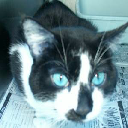

In [29]:
#visualizar a primeira imagem
index = 1200
print("index:",index)
print("categoria: ",y[index])
img = (x[index])
cv2_imshow(img)

In [30]:
# Realiza a separação do meu conjunto treino e teste
#obter conjunto de testes e treino
X_train, X_test, y_train, y_test = train_test_split( np.array(x), np.array(y), test_size=0.30)
print(f"X_treino:{len(X_train)},y_treino:{len(y_train)},X_teste:{len(X_test)},y_teste:{len(y_test)}")

X_treino:2800,y_treino:2800,X_teste:1200,y_teste:1200


In [31]:
X_train.shape

(2800, 128, 128, 3)

In [32]:
# importando a rede vgg16 pré-treinada
from keras.applications import VGG16

In [33]:
#definindo rede vgg16
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
model_vgg16.summary() # informações das camadas

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [34]:
# visualizando a quantidade de camadas que o modelo  possui.
len(model_vgg16.layers)

19

In [35]:
# Congelando os pesos das camadas para serem reaproveitadas.
for layer in model_vgg16.layers:
  layer.trainable = False

* **O modelo possui 19 camadas que iremos reaproveitar, para isso foi utilizado o parametro False em layer.trainable para fixar os pesos das camadas.**

In [36]:
# acessando a ultima camada do modelo base, pois após ela iremos adicionar a estrutura densa.
model_vgg16.output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

* A última camada possui 512 conexões.
* Dropout irá descartar 20% das conexões para próxima camada, isso reduz o overfitting.
* Ao final criamos uma camada densa de 2 conexões para classificação (gato,cão).

In [37]:
#importação das libs necessárias para criarmos as camadas adicionais.
import tensorflow as tf
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

In [38]:
head_model = model_vgg16.output
head_model = tf.keras.layers.GlobalAveragePooling2D()(head_model)
head_model = Dense(512, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(512, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(2, activation = 'softmax')(head_model)

* **Construção e treinamento da rede neural**.

In [39]:
# lib necessária para implementar o modelo.
from keras.models import Model

In [40]:
# Agora literalmente realizando a ligação entre o model_vgg16 e as camadas que foram implementadas.
network = Model(inputs = model_vgg16.input, outputs = head_model)

In [41]:
# visualizando as informações das camadas.
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [42]:
# Adicionamos as 6 camadas finais ao modelo.
len(network.layers)

25

In [43]:
# compilando o modelo.
network.compile(loss = 'categorical_crossentropy', optimizer='Adam', 
                metrics = ['accuracy'])

In [72]:
# Realizando o treimanto com 5 epocas.
historico = network.fit(np.array(X_train) , np.array(y_train), validation_data=(np.array(X_test) , np.array(y_test)), epochs=5) #, verbose=1, batch_size = 100)


<ipython-input-72-4f5cd32c4ef2>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  historico = network.fit(np.array(X_train) , np.array(y_train), validation_data=(np.array(X_test) , np.array(y_test)), epochs=5) #, verbose=1, batch_size = 100)


ValueError: ignored

In [45]:
historico = network.fit(X_train , y_train, validation_data=(X_test , y_test), epochs=10, verbose=1, batch_size = 100)

Epoch 1/10
28/28 [==============================] - 10s 245ms/step - loss: 0.0326 - accuracy: 0.9875 - val_loss: 0.3267 - val_accuracy: 0.9158
Epoch 2/10
28/28 [==============================] - 7s 239ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.3343 - val_accuracy: 0.9217
Epoch 3/10
28/28 [==============================] - 7s 239ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.3284 - val_accuracy: 0.9242
Epoch 4/10
28/28 [==============================] - 7s 243ms/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.3466 - val_accuracy: 0.9208
Epoch 5/10
28/28 [==============================] - 7s 243ms/step - loss: 0.0085 - accuracy: 0.9996 - val_loss: 0.3488 - val_accuracy: 0.9225
Epoch 6/10
28/28 [==============================] - 7s 244ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.3773 - val_accuracy: 0.9225
Epoch 7/10
28/28 [==============================] - 7s 241ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.3801 - val_accuracy: 0.9258
Epoch

In [46]:
# Avaliando a rede neural com o conjunto de teste.
network.evaluate(X_test,y_test)

38/38 [==============================] - 2s 53ms/step - loss: 0.3997 - accuracy: 0.9167


[0.3996891677379608, 0.9166666865348816]

In [48]:
# Realizando as previsões no conjunto de teste.
previsoes = network.predict(X_test, batch_size=100)
previsoes

12/12 [==============================] - 2s 165ms/step


array([[0.0000000e+00, 1.0000000e+00],
       [1.6740329e-23, 1.0000000e+00],
       [2.2166964e-20, 1.0000000e+00],
       ...,
       [2.2123032e-03, 9.9778771e-01],
       [5.0299292e-07, 9.9999952e-01],
       [9.5830947e-01, 4.1690491e-02]], dtype=float32)

In [49]:
# previsões para o conjunto de teste.
previsoes = np.argmax(previsoes, axis = 1)
previsoes[:10] # 10 primeiros registros.

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [53]:
# classificação real do conjunto de teste.
real = np.argmax(y_test, axis = 1)
real[:10] # 10 primeiros registros

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [55]:
# usando a função de acurária do sklearn apenas para comparar se os resultados estão corretos.
from sklearn.metrics import accuracy_score
# usando a função de acurária do sklearn apenas para comparar se os resultados estão corretos.
from sklearn.metrics import accuracy_score
accuracy_score(real, previsoes)

0.9166666666666666

* **Conforme o resultado, tivemos 91,6 % de acurácia no conjunto de teste.**
* **Vamos plotar o gráfico da matriz de conjusão.**

In [58]:
treino.class_indices

{'cats': 0, 'dogs': 1}

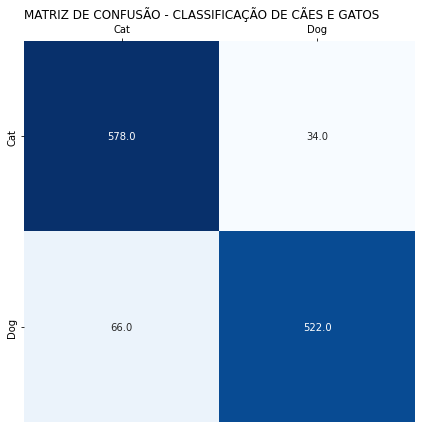

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(real, previsoes)
# figure
fig, ax = plt.subplots(figsize=(7, 7))
# plot heatmap
sns.heatmap(cm, cmap="Blues",annot=True,fmt=".1f",cbar=False)
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Cat', 'Dog']
plt.xticks(np.arange(2) + .5, labels=xticks_labels)

# yticks
ax.yaxis.tick_left()
yticks_labels = ['Cat', 'Dog']
plt.yticks(np.arange(2) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Matriz de confusão - Classificação de Cães e Gatos'.upper()
plt.title(title, loc='left')
plt.show()

* **O modelo acertou 578 gatos dos 612 gatos existentes no conjunto de teste.**
* **O modelo acertou 522 cães dos 588 cães existentes no conjunto de teste.**

In [64]:
from sklearn.metrics import classification_report
print(classification_report(real, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       612
           1       0.94      0.89      0.91       588

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200

